In [179]:
import h5py
import matplotlib.pyplot as plt
import numpy
from functional import *

In [180]:
x_data = np.genfromtxt("x_data_gaussian.txt", dtype=None)
y_data = np.genfromtxt("y_data_gaussian.txt", dtype=None)
z_data = np.genfromtxt("z_data_gaussian.txt", dtype=None)

In [181]:
# Set damping factor to get lifetime broadening
DAMP = 0.01

In [182]:
time = x_data[1:, 0]
dt = time[1] - time[0]

In [183]:
ux = x_data[1:, 2]
uy = y_data[1:, 3]
uz = z_data[1:, 4]
signals = [ux, uy, uz]

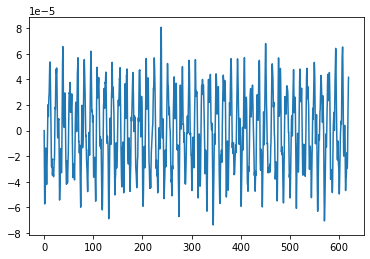

In [184]:
plt.plot(time, ux)

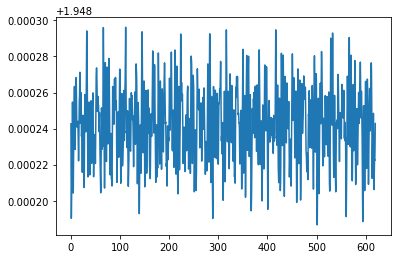

In [185]:
plt.plot(time, uy)

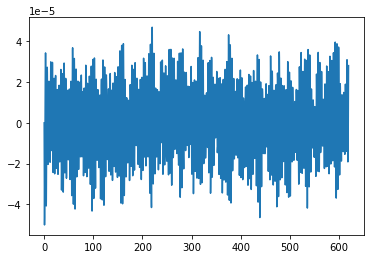

In [186]:
plt.plot(time, uz)

In [187]:
# Fourier transformed spectra
spects = []
freq = None
for s in signals:
    s -= s[0]
    s *= np.exp(-DAMP*time)
    #w, f = fourier_tx(s, dt, 0)
    w, f = pade_tx(s, dt, (0,5))
    freq = w
    spects.append(f)

In [188]:
spects

[array([-0.00267995+0.00000000e+00j, -0.00267996-9.88787703e-08j,
        -0.00267996-1.97777583e-07j, ...,  0.00011046+1.20611305e-05j,
         0.00011044+1.20547593e-05j,  0.00011042+1.20484940e-05j]),
 array([-0.00174868+0.00000000e+00j, -0.00174869+1.60765983e-07j,
        -0.00174872+3.20173368e-07j, ...,  0.00011585+1.29855885e-05j,
         0.00011582+1.29860745e-05j,  0.00011579+1.29862559e-05j]),
 array([-0.00079644-0.00000000e+00j, -0.00079644-3.15468913e-08j,
        -0.00079644-6.30908775e-08j, ...,  0.00012796+1.45569317e-05j,
         0.00012793+1.45509585e-05j,  0.0001279 +1.45448776e-05j])]

In [189]:
total = sum([f.imag for f in spects]) / 3
total *= -freq

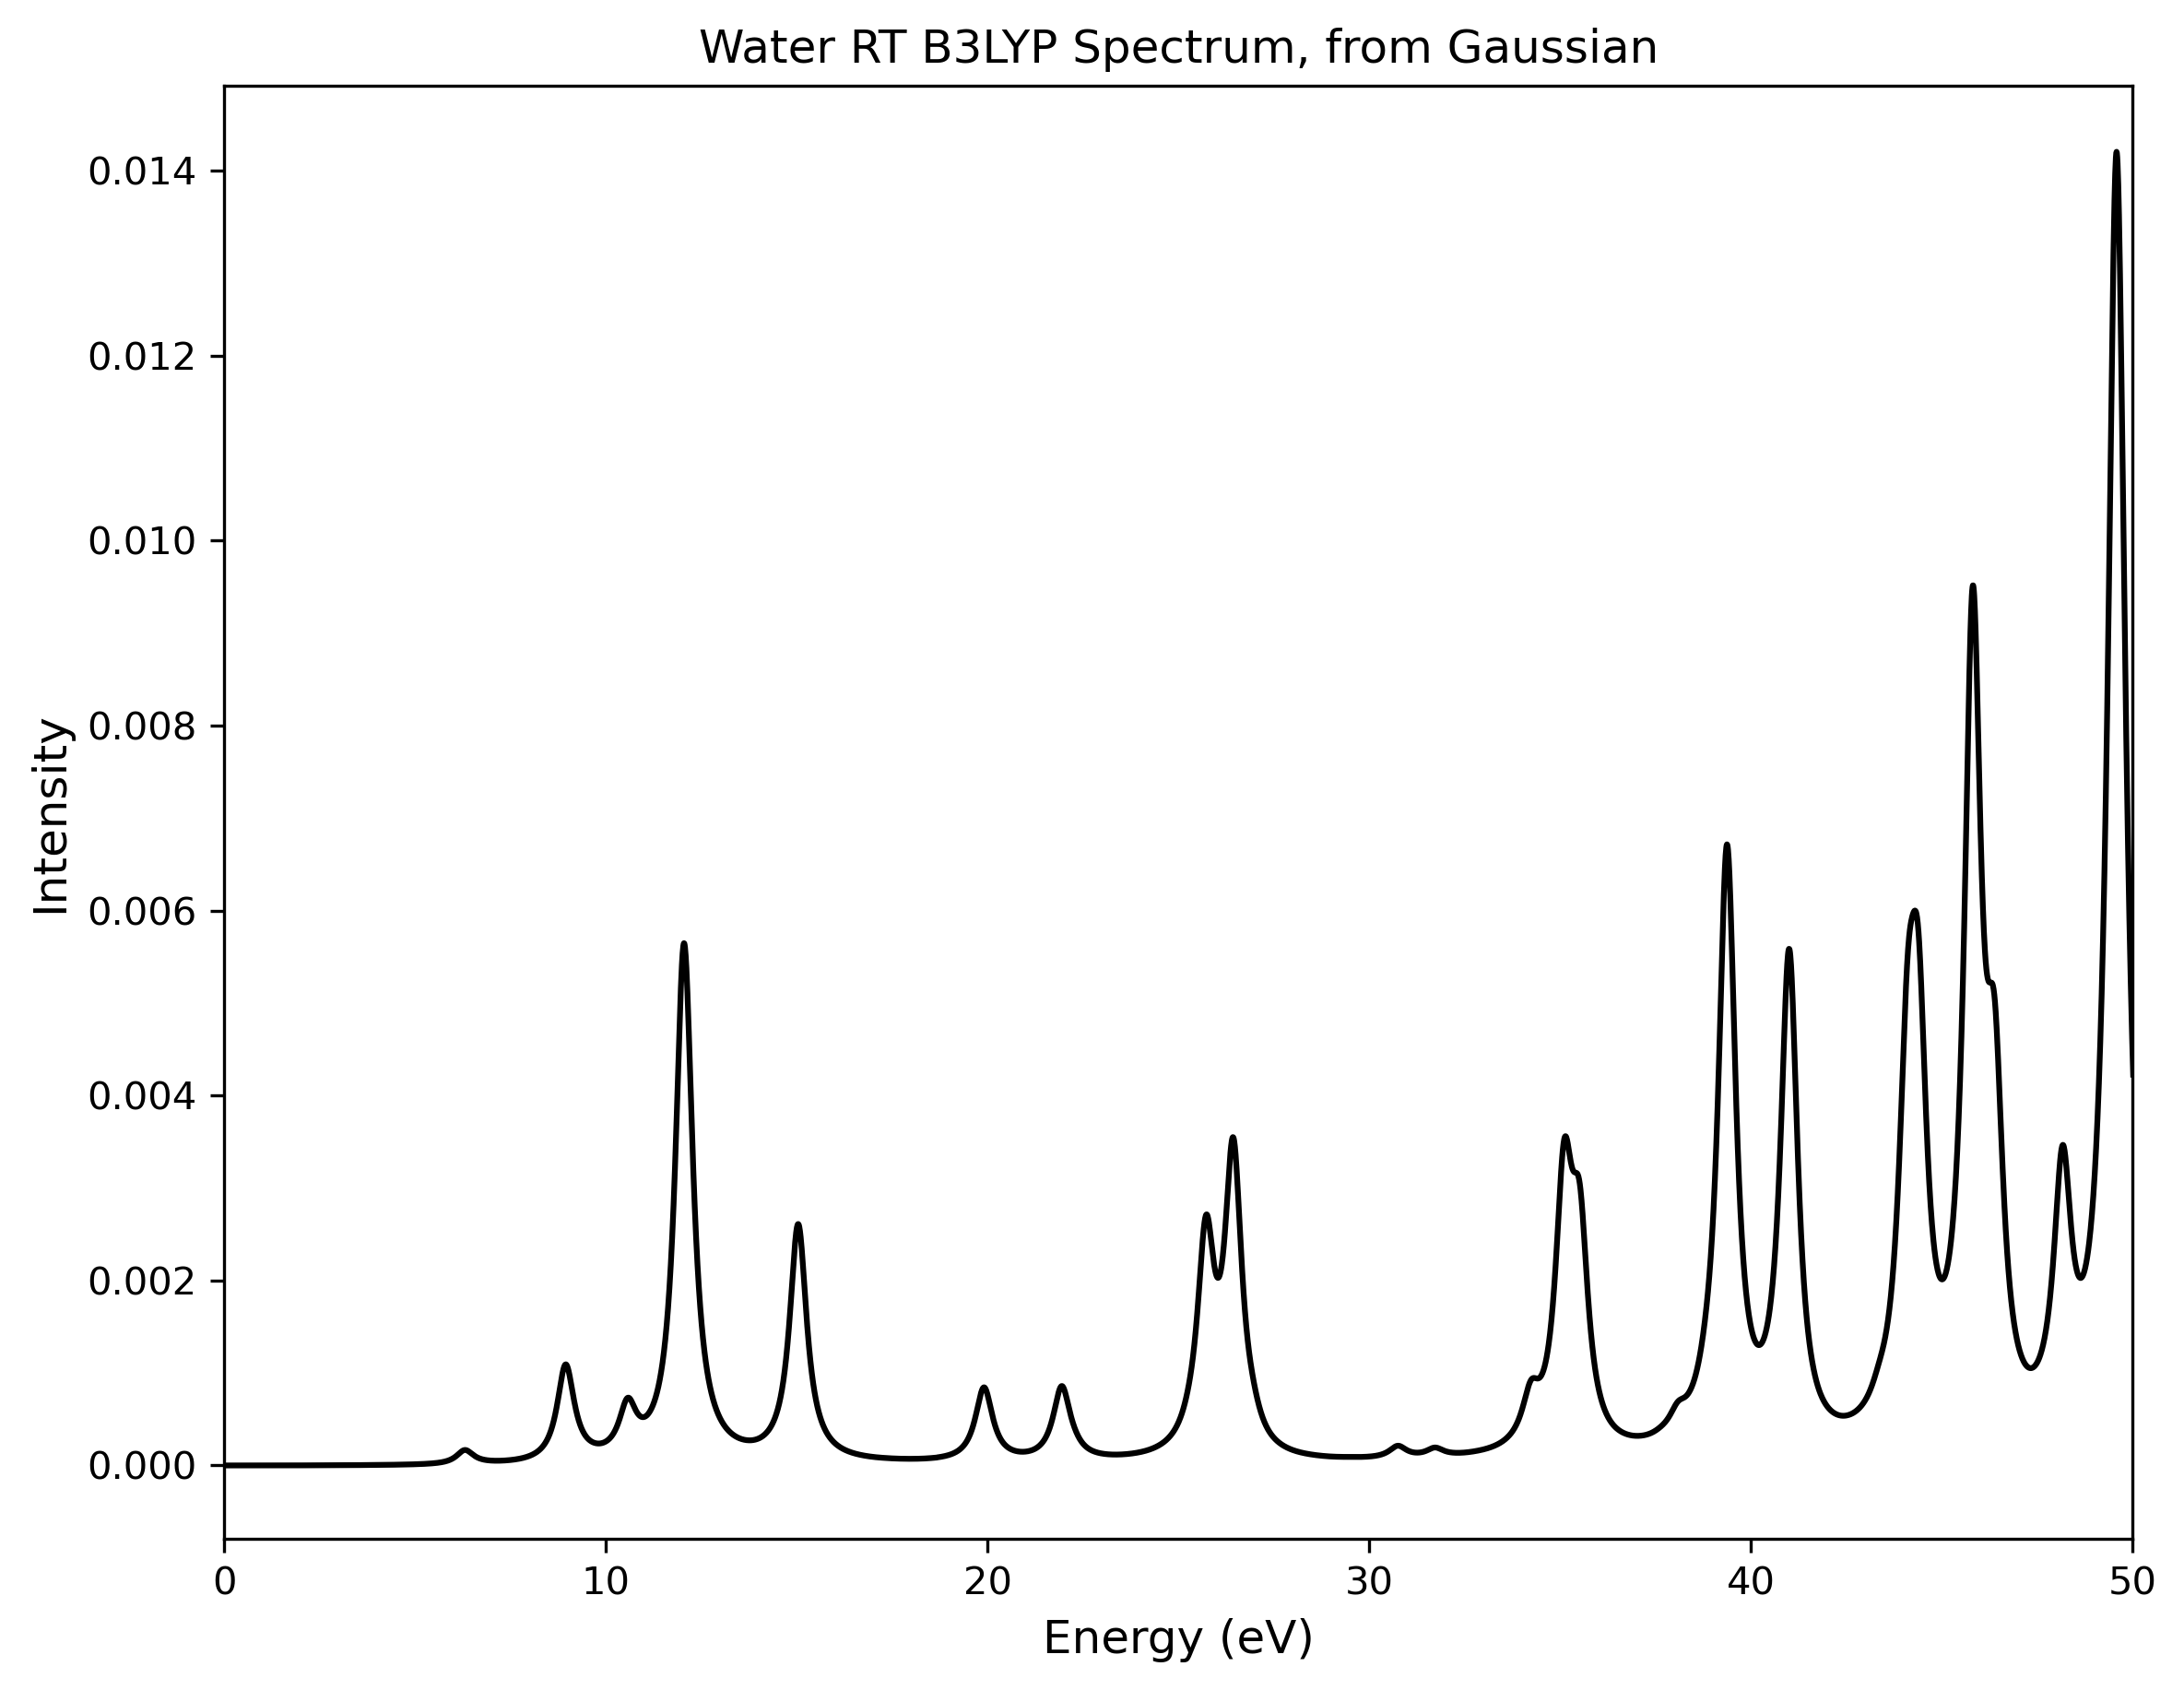

In [190]:
# Plotting
figure(figsize = (8, 6), dpi=300)
plt.plot(freq*27.2114, total, c='k')
plt.xlim(0,50)
#plt.ylim(0,0.175)
plt.ylabel("Intensity", fontsize=12)
plt.xlabel("Energy (eV)", fontsize=12)
plt.tight_layout()
plt.title("Water RT B3LYP Spectrum, from Gaussian")
#plt.savefig("water_fourier_thin.pdf")
plt.show()